In [114]:
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt

file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

In [115]:
# 太阳时角
# 输入量是北京时间，输出太阳时角的弧度值
def W(Tm):
    # Tm使用本地时间即可
    W = np.pi * (Tm - 12) / 12 

    return W

In [116]:
Time = list([9, 10.5, 12, 13.5, 15])
for i in Time:
    print("Time: ", i, "W: ", W(i)*180/np.pi)

Time:  9 W:  -45.0
Time:  10.5 W:  -22.5
Time:  12 W:  0.0
Time:  13.5 W:  22.5
Time:  15 W:  45.0


In [117]:
# 太阳赤纬角
# 输入量是一年中的哪一天，输出太阳赤纬角的弧度值
def Th(D):
    D -= 80
    if D < 0:
        D += 365

    sin_th = np.sin(2 * np.pi * D / 365) * np.sin(2 * np.pi * 23.45 / 360)  # 太阳赤纬角th的sin值
    hudu_th = m.asin(sin_th)  # 太阳赤纬角th的弧度值

    return hudu_th

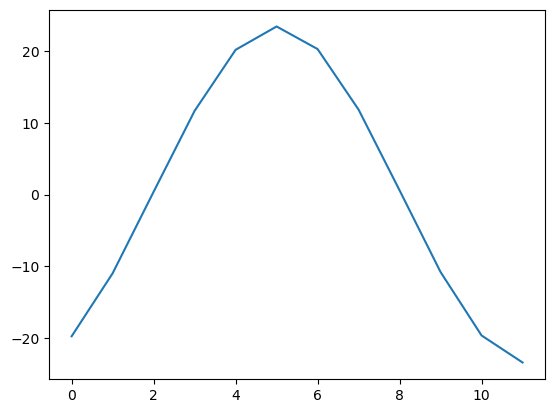

[-19.766244608575374, -10.982634875921457, 0.3924809652002564, 11.678796866736246, 20.194192347874857, 23.449769850387526, 20.29747607225298, 11.85094403561769, 0.5886908567539737, -10.806764286880998, -19.655607202741624, -23.4221599627244]


In [118]:
Date = list(range(21, 365, 30))
DB = []
for i in Date:
    DB.append(Th(i)*180/np.pi)
# 画图
x = np.arange(0,len(DB))
plt.plot(x, DB)
plt.show()

print(DB)

In [119]:
# 太阳高度角
# 输入量是一年中的哪一天和一天中的哪个时刻，输出太阳高度角的弧度值
def As(D,tm):
    temp_hudu_th = Th(D)
    temp_sin_th = np.sin(temp_hudu_th)

    sin_as = np.cos(temp_hudu_th)*np.cos(39.4*np.pi/180)*np.cos(W(tm))+temp_sin_th*np.sin(39.4*np.pi/180) # 太阳高度角的sin值
    hudu_as = m.asin(sin_as) # 太阳高度角的弧度值

    return hudu_as
# 冬至到夏至 高度角逐渐增加

Date:  21 Time:  9 As:  17.430915460183293
Date:  21 Time:  10.5 As:  27.20616975343269
Date:  21 Time:  12 As:  30.833755391424628
Date:  21 Time:  13.5 As:  27.20616975343269
Date:  21 Time:  15 As:  17.430915460183293
Date:  51 Time:  9 As:  24.54918739552608
Date:  51 Time:  10.5 As:  35.44449065517637
Date:  51 Time:  12 As:  39.617365124078546
Date:  51 Time:  13.5 As:  35.44449065517637
Date:  51 Time:  15 As:  24.54918739552608
Date:  81 Time:  9 As:  33.41781233807782
Date:  81 Time:  10.5 As:  45.9096838313131
Date:  81 Time:  12 As:  50.992480965200265
Date:  81 Time:  13.5 As:  45.9096838313131
Date:  81 Time:  15 As:  33.41781233807782
Date:  111 Time:  9 As:  41.57337310310388
Date:  111 Time:  10.5 As:  55.85486421735038
Date:  111 Time:  12 As:  62.27879686673625
Date:  111 Time:  13.5 As:  55.85486421735038
Date:  111 Time:  15 As:  41.57337310310388
Date:  141 Time:  9 As:  47.048224443262775
Date:  141 Time:  10.5 As:  62.76513036365249
Date:  141 Time:  12 As:  70.7

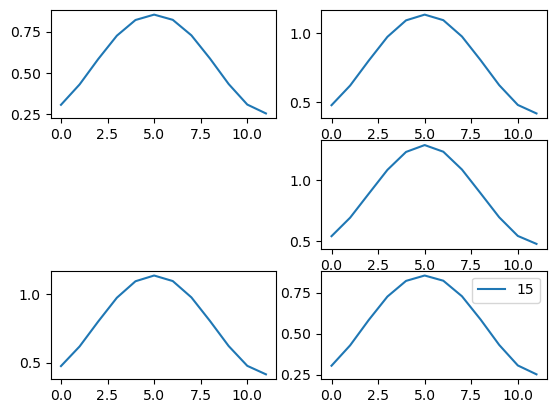

[0.30422686641698105, 0.42846414874102157, 0.5832508541130424, 0.7255922418092149, 0.8211464237522114, 0.8539248773921367, 0.8222222866796567, 0.7276423078628228, 0.5858379438230279, 0.4309173598367531, 0.3058096236947239, 0.251724748652814]


In [120]:
Date = list(range(21, 365, 30))
Time = list([9, 10.5, 12, 13.5, 15])
DB9 = []
DB10 = []
DB12 = []
DB13 = []
DB15 = []
for i in Date:
    for j in Time:
        print("Date: ", i, "Time: ", j, "As: ", As(i, j)*180/np.pi%180)
        if j == 9:
            DB9.append(As(i, j))
        elif j == 10.5:
            DB10.append(As(i, j))
        elif j == 12:
            DB12.append(As(i, j))
        elif j == 13.5:
            DB13.append(As(i, j))
        elif j == 15:
            DB15.append(As(i, j))
# 同时绘制多个曲线
plt.figure()
plt.subplot(3,2,1)
plt.plot(range(0,len(DB9)), DB9, label='9')
plt.subplot(3,2,2)
plt.plot(range(0,len(DB10)), DB10, label='10.5')
plt.subplot(3,2,4)
plt.plot(range(0,len(DB12)), DB12, label='12')
plt.subplot(3,2,5)
plt.plot(range(0,len(DB13)), DB13, label='13.5')
plt.subplot(3,2,6)
plt.plot(range(0,len(DB15)), DB15, label='15')
plt.legend()
plt.show()

print(DB9)

In [121]:
# 太阳方位角ys
# 输入量是一年中的哪一天和一天中的哪个时刻，输出太阳方位角的角度值
def Ys(D,tm):
    cos_ys = (np.sin(Th(D))-(np.sin(As(D,tm))*np.sin(39.4*np.pi/180)))/(np.cos(As(D,tm))*np.cos(39.4*np.pi/180)) # 太阳方位角的cos值
    hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值
    
    jiaodu_ys = 0
    if tm<=12 and tm>=0:
        jiaodu_ys = hudu_ys*180/np.pi
    elif tm>12 and tm<=24:
        jiaodu_ys = 360-hudu_ys*180/np.pi
    
    return (jiaodu_ys)

Date:  21 Time:  9 As: 17.430915460183293 Ys:  135.77539232606108
Date:  21 Time:  10.5 As: 27.20616975343269 Ys:  156.11295277254948
Date:  21 Time:  12 As: 30.833755391424628 Ys:  180.0
Date:  21 Time:  13.5 As: 27.20616975343269 Ys:  203.88704722745052
Date:  21 Time:  15 As: 17.430915460183293 Ys:  224.22460767393892
Date:  51 Time:  9 As: 24.54918739552608 Ys:  130.25818038260988
Date:  51 Time:  10.5 As: 35.44449065517637 Ys:  152.53977484197318
Date:  51 Time:  12 As: 39.617365124078546 Ys:  179.99999879258175
Date:  51 Time:  13.5 As: 35.44449065517637 Ys:  207.46022515802682
Date:  51 Time:  15 As: 24.54918739552608 Ys:  229.74181961739012
Date:  81 Time:  9 As: 33.41781233807782 Ys:  122.09776877205007
Date:  81 Time:  10.5 As: 45.9096838313131 Ys:  146.63405416378347
Date:  81 Time:  12 As: 50.992480965200265 Ys:  nan
Date:  81 Time:  13.5 As: 45.9096838313131 Ys:  213.36594583621653
Date:  81 Time:  15 As: 33.41781233807782 Ys:  237.90223122794993
Date:  111 Time:  9 As: 41

C:\Users\33398\AppData\Local\Temp\ipykernel_10624\179879945.py:5: RuntimeWarning: invalid value encountered in arccos
  hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值


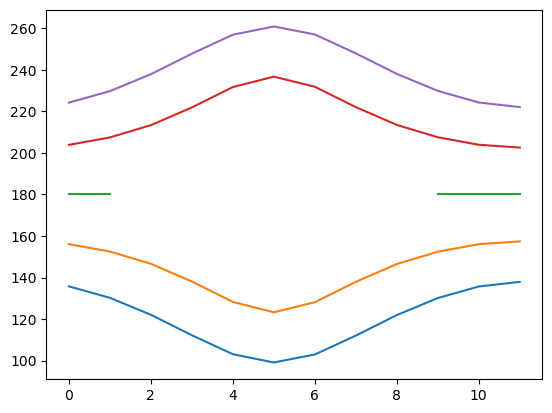

[135.77539232606108, 130.25818038260988, 122.09776877205007, 112.23681068536169, 103.1039721499788, 99.12947990644962, 102.98227870488718, 112.06843511178386, 121.94361923329666, 130.14190434279442, 135.7089469917735, 137.93633033530617]


In [122]:
Date = list(range(21, 365, 30))
Time = list([9, 10.5, 12, 13.5, 15])
DB9 = []
DB10 = []
DB12 = []
DB13 = []
DB15 = []

for i in Date:
    for j in Time:
        print("Date: ", i, "Time: ", j,"As:", As(i,j)*180/np.pi%180, "Ys: ", Ys(i,j))
        if j == 9:
            DB9.append(Ys(i,j))
        elif j == 10.5:
            DB10.append(Ys(i,j))
        elif j == 12:
            DB12.append(Ys(i,j))
        elif j == 13.5:
            DB13.append(Ys(i,j))
        elif j == 15:
            DB15.append(Ys(i,j))
        
# 画图
plt.plot(np.arange(0,len(DB9)), DB9, label='9')
plt.plot(np.arange(0,len(DB10)), DB10, label='10.5')
plt.plot(np.arange(0,len(DB12)), DB12, label='12')
plt.plot(np.arange(0,len(DB13)), DB13, label='13.5')
plt.plot(np.arange(0,len(DB15)), DB15, label='15')
plt.show()

print(DB9)

In [123]:
 # 太阳辐射热量
def QDNI(D,tm):
    G0 = 1.366; # 太阳常数
    H = 3; # 海拔高度
    a = 0.4237 - 0.00821*((6-H)**2) # 大气压强
    b = 0.5055 + 0.00595*((6.5-H)**2) # 大气压强
    c = 0.2711 + 0.01858*((2.5-H)**2) # 大气压强
    DNI = G0*(a+b*np.exp(-c/np.sin(As(D,tm))))
    
    if np.sin(As(D,tm)) == 0:
        return 0
    else:
        DNI = G0*(a+b*np.exp(-c/np.sin(As(D,tm))))

        return DNI

In [124]:
print(QDNI(21, 9))

0.7925396841601171


C:\Users\33398\AppData\Local\Temp\ipykernel_10624\179879945.py:5: RuntimeWarning: invalid value encountered in arccos
  hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值


Date:  21 Time:  9 As: 17.430915460183293 Ys:  7779.356942016246 QDNI:  0.7925396841601171
Date:  21 Time:  10.5 As: 27.20616975343269 Ys:  8944.613321192228 QDNI:  0.9100911454852126
Date:  21 Time:  12 As: 30.833755391424628 Ys:  10313.240312354817 QDNI:  0.9391840362887128
Date:  21 Time:  13.5 As: 27.20616975343269 Ys:  11681.867303517407 QDNI:  0.9100911454852126
Date:  21 Time:  15 As: 17.430915460183293 Ys:  12847.123682693391 QDNI:  0.7925396841601171
Date:  51 Time:  9 As: 24.54918739552608 Ys:  7463.243982977321 QDNI:  0.8846900340177761
Date:  51 Time:  10.5 As: 35.44449065517637 Ys:  8739.885306320917 QDNI:  0.968935592963155
Date:  51 Time:  12 As: 39.617365124078546 Ys:  10313.240243174849 QDNI:  0.9905433274092325
Date:  51 Time:  13.5 As: 35.44449065517637 Ys:  11886.595318388718 QDNI:  0.968935592963155
Date:  51 Time:  15 As: 24.54918739552608 Ys:  13163.236641732316 QDNI:  0.8846900340177761
Date:  81 Time:  9 As: 33.41781233807782 Ys:  6995.68683860269 QDNI:  0.9567

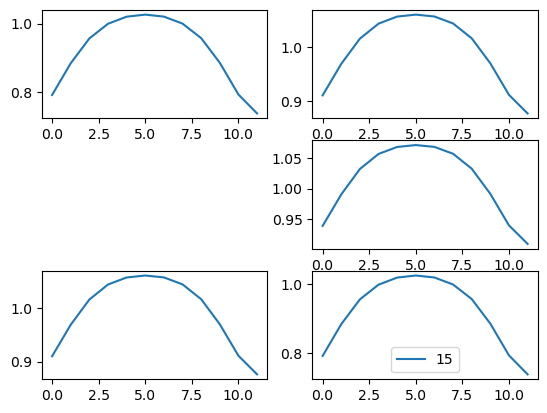

0.7389796075758027
1.0709296409490472


In [125]:
Date = list(range(21, 366, 30))
Time = list([9, 10.5, 12, 13.5, 15])
DB9 = []
DB10 = []
DB12 = []
DB13 = []
DB15 = []

max = 0
min = 100000

for i in Date:
    for j in Time:
        print("Date: ", i, "Time: ", j,"As:", As(i,j)*180/np.pi%180, "Ys: ", Ys(i,j)*180/np.pi, "QDNI: ", QDNI(i, j))
        if j == 9 and QDNI(i,j) < 100:
            DB9.append(QDNI(i, j))
        elif j == 10.5 and QDNI(i,j) < 100:
            DB10.append(QDNI(i, j))
        elif j == 12 and QDNI(i,j) < 100:
            DB12.append(QDNI(i, j))
        elif j == 13.5 and QDNI(i,j) < 100:
            DB13.append(QDNI(i, j))
        elif j == 15 and QDNI(i,j) < 100:
            DB15.append(QDNI(i, j))
        
        if QDNI(i, j) > max:
            max = QDNI(i, j)
        if QDNI(i, j) < min:
            min = QDNI(i, j)

plt.figure()
plt.subplot(3,2,1)
plt.plot(range(0,len(DB9)), DB9, label='9')
plt.subplot(3,2,2)
plt.plot(range(0,len(DB10)), DB10, label='10.5')
plt.subplot(3,2,4)
plt.plot(range(0,len(DB12)), DB12, label='12')
plt.subplot(3,2,5)
plt.plot(range(0,len(DB13)), DB13, label='13.5')
plt.subplot(3,2,6)
plt.plot(range(0,len(DB15)), DB15, label='15')

plt.legend()
plt.show()

print(min)
print(max)

In [126]:
# 计算太阳入射向量
def SunAngel(hudu_a_s, hudu_ys):
    # hudu_a_s为太阳高度角的弧度值
    # hudu_ys为太阳方位角的弧度值
    # 返回太阳入射向量
    x = -np.cos(hudu_a_s)*np.sin(hudu_ys)
    y = -np.cos(hudu_a_s)*np.cos(hudu_ys)
    z = -np.sin(hudu_a_s)
    
    return np.array([x, y, z])

Date:  21 Count:  2775
Date:  51 Count:  1335


C:\Users\33398\AppData\Local\Temp\ipykernel_10624\179879945.py:5: RuntimeWarning: invalid value encountered in arccos
  hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值


Date:  81 Count:  738
Date:  111 Count:  805
Date:  141 Count:  850
Date:  171 Count:  829
Date:  201 Count:  966
Date:  231 Count:  814
Date:  261 Count:  745
Date:  291 Count:  1340
Date:  321 Count:  2777


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Date:  351 Count:  4270
[2775, 1335, 738, 805, 850, 829, 966, 814, 745, 1340, 2777, 4270]
0.9681948424068768
0.9846991404011461
0.991541547277937
0.9907736389684814
0.9902578796561604
0.9904985673352436
0.9889283667621777
0.9906704871060172
0.9914613180515759
0.9846418338108882
0.9681719197707737
0.9510601719197708
平均值：  0.9825749761222541


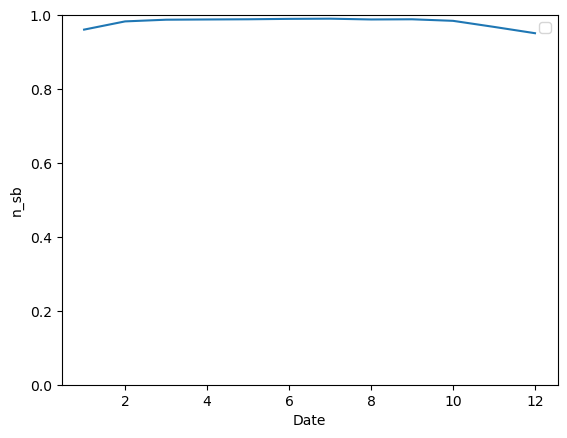

In [127]:
# 求阴影效率
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

Date = np.array(range(21,365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

DB = []
DB9 = []
DB10 = []
DB12 = []
DB13 = []
DB15 = []
count = 0 # 记录俯仰角大于130的次数

for i in Date:
    # 俯仰角大于130的次数
    count = 0
    
    for j in Time:
        
        for k in range(0, len(df)): # df.iloc[i, 0]
            w = W(j)
            # th为太阳赤纬角
            hudu_th = Th(i)
            jiaodu_th = hudu_th*180/np.pi
            sin_th = np.sin(Th(i))
            # a_s为太阳高度角
            hudu_a_s = As(i, j)
            sin_a_s = np.sin(hudu_a_s)
            jiaodu_a_s = hudu_a_s*180/np.pi
            # ys为太阳方位角
            jiaodu_ys = Ys(i, j)
            hudu_ys = jiaodu_ys*np.pi/180
            sin_ys = np.sin(hudu_ys)
            
            # 计算太阳入射向量
            Sun = SunAngel(hudu_a_s, hudu_ys)
            
            # 计算集日镜出射向量
            Out = np.array([df.iloc[k, 0], df.iloc[k, 1], 80])
            
            # 归一化
            Sun = Sun / np.linalg.norm(Sun)
            Out = Out / np.linalg.norm(Out)
            
            # 法向量
            Normal = Sun + Out
            Normal = Normal / np.linalg.norm(Normal)
            
            # 计算倾斜角
            hudu_qxj = np.arccos(np.dot(Normal, [0, 0, 1]))
            jiaodu_qxj = hudu_qxj*180/np.pi
            
            # 存入数组
            if j == 9:
                DB9.append(jiaodu_qxj)
            elif j == 10.5:
                DB10.append(jiaodu_qxj)
            elif j == 12:
                DB12.append(jiaodu_qxj)
            elif j == 13.5:
                DB13.append(jiaodu_qxj)
            elif j == 15:
                DB15.append(jiaodu_qxj)
            
            #统计大于130的次数
            if jiaodu_qxj >= 135 or jiaodu_qxj <= 90:
                count += 1
                
    print("Date: ", i, "Count: ", count)
    DB.append(count)

Result = []

print(DB)
Sum_yyxl = 0
for i in DB:
    yyxl = 1 - 0.1*i/8725
    Sum_yyxl += yyxl
    print(yyxl)
    Result.append(yyxl)
    
everage = Sum_yyxl / len(DB)
print("平均值： ", everage)

# Result_new = []
# temp = Result[-2:]  # 获取最后两个元素
# Result_new = temp + Result[:-2]  # 将最后两个元素与除最后两个元素外的元素拼接

# 画图
plt.figure()
plt.plot(range(1,len(Result)+1), Result_new )
#添加x，y轴名称
plt.xlabel('Date')
plt.ylabel('n_sb')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [128]:
# 计算倾斜角的函数
def QXJ(D,tm,x,y):

    # a_s为太阳高度角
    hudu_a_s = As(i, j)
            
    # ys为太阳方位角
    jiaodu_ys = Ys(i, j)
    hudu_ys = jiaodu_ys*np.pi/180
            
    # 计算太阳入射向量
    Sun = SunAngel(hudu_a_s, hudu_ys)
            
    # 计算集日镜出射向量
    Out = np.array([x, y, 80])
            
    # 归一化
    Sun = Sun / np.linalg.norm(Sun)
    Out = Out / np.linalg.norm(Out)
            
    # 法向量
    Normal = Sun + Out
    Normal = Normal / np.linalg.norm(Normal)
            
    # 计算倾斜角
    hudu_qxj = np.arccos(np.dot(Normal, [0, 0, 1]))
    jiaodu_qxj = hudu_qxj*180/np.pi  
    
    return jiaodu_qxj

Date:  21 Count:  2775
Date:  51 Count:  1335


C:\Users\33398\AppData\Local\Temp\ipykernel_10624\179879945.py:5: RuntimeWarning: invalid value encountered in arccos
  hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值


Date:  81 Count:  738
Date:  111 Count:  805
Date:  141 Count:  850
Date:  171 Count:  829
Date:  201 Count:  966
Date:  231 Count:  814
Date:  261 Count:  745
Date:  291 Count:  1340
Date:  321 Count:  2777


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Date:  351 Count:  4270
[2775, 1335, 738, 805, 850, 829, 966, 814, 745, 1340, 2777, 4270]
0.9681948424068768
0.9846991404011461
0.991541547277937
0.9907736389684814
0.9902578796561604
0.9904985673352436
0.9889283667621777
0.9906704871060172
0.9914613180515759
0.9846418338108882
0.9681719197707737
0.9510601719197708
平均值：  0.9825749761222541


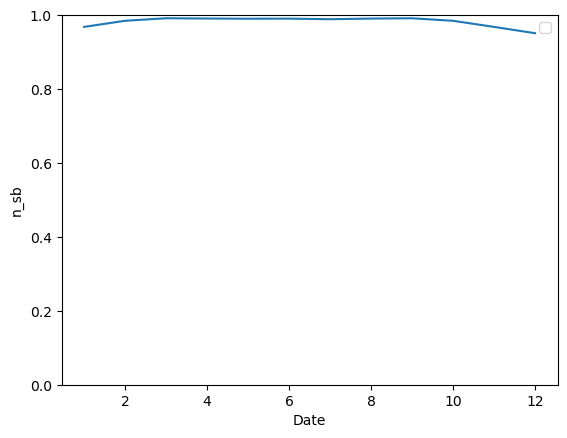

In [129]:
# 求阴影效率
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

Date = np.array(range(21,365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

DB = []
DB9 = []
DB10 = []
DB12 = []
DB13 = []
DB15 = []
count = 0 # 记录俯仰角大于130的次数

for i in Date:
    # 俯仰角大于130的次数
    count = 0
    
    for j in Time:
        
        for k in range(0, len(df)): # df.iloc[i, 0]
            jiaodu_qxj = QXJ(i, j, df.iloc[k, 0], df.iloc[k, 1])
            
            # 存入数组
            if j == 9:
                DB9.append(jiaodu_qxj)
            elif j == 10.5:
                DB10.append(jiaodu_qxj)
            elif j == 12:
                DB12.append(jiaodu_qxj)
            elif j == 13.5:
                DB13.append(jiaodu_qxj)
            elif j == 15:
                DB15.append(jiaodu_qxj)
            
            #统计大于130的次数
            if jiaodu_qxj >= 135 or jiaodu_qxj <= 90:
                count += 1
                
    print("Date: ", i, "Count: ", count)
    DB.append(count)

n_sb = []

print(DB)
Sum_yyxl = 0
for i in DB:
    yyxl = 1 - 0.1*i/8725
    Sum_yyxl += yyxl
    print(yyxl)
    n_sb.append(yyxl)
    
everage = Sum_yyxl / len(DB)
print("平均值： ", everage)

# 画图
plt.figure()
plt.plot(range(1,len(Result)+1), n_sb)
#添加x，y轴名称
plt.xlabel('Date')
plt.ylabel('n_sb')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [130]:
# 存所有的倾斜角
Sum = 0
for i in DB:
    Sum += i

print(Sum)

18244


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


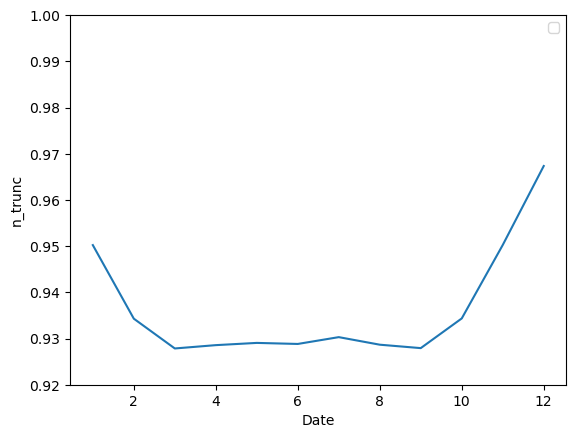

[0.9502219591595147, 0.9342955246464529, 0.9278481597928612, 0.9285672971253399, 0.929050925925926, 0.9288251698082642, 0.930299939733902, 0.9286639825998426, 0.9279232414311313, 0.9343499010592481, 0.9502444568086844, 0.9673415280790553]


In [131]:
# 求截断效率

Date = np.array(range(21,365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

everage_DNI = []
for i in Date:
    sum = 0
    for j in Time:
        sum += QDNI(i, j)
    everage_DNI.append(sum/5)

# print(everage_DNI)
n_trunc = []
for i in range(0, len(everage_DNI)):
    n_trunc.append(0.92/(1-((DB[i]*0.1)/(5*1745))))

# 画图
plt.figure()
plt.plot(range(1,len(n_trunc)+1), n_trunc)
#添加x，y轴名称
plt.xlabel('Date')
plt.ylabel('n_trunc')
plt.ylim(0.92, 1)
plt.legend()
plt.show()

print(n_trunc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


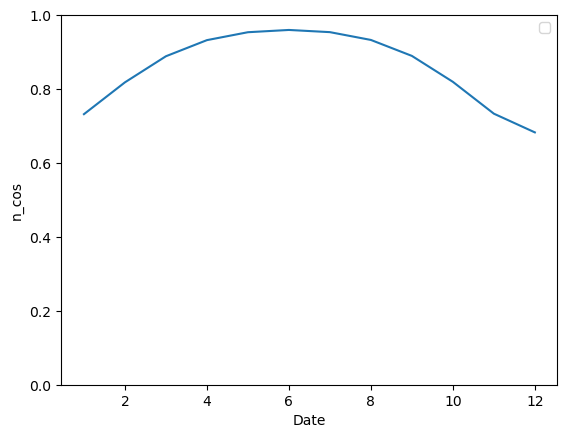

[0.7320161308208695, 0.8181258478790857, 0.8887228372625244, 0.9323221193463549, 0.9537381127262042, 0.9598696371933808, 0.9539488575426638, 0.9328406239856248, 0.889667229523275, 0.8195059016116634, 0.7333571134820288, 0.6827189212610177]


In [145]:
# 求余弦效率

Date = np.array(range(21,365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

n_cos = []

for i in Date:
    sum = 0
    for j in Time:
        # 天顶角
        hudu_td = (np.pi/2)-As(i,j)
        # 大气质量
        AM = 1/np.cos(hudu_td)
        # 直接辐射
        Id = 1.353*0.7**(AM**0.678)
        
        sunshi = (0.7*1.353-Id)/(0.7*1.366)
        xiaolv = 1-sunshi
        
        sum += xiaolv
    
    n_cos.append(sum/5)
    
# 画图
plt.figure()
plt.plot(range(1,len(n_cos)+1), n_cos)
#添加x，y轴名称
plt.xlabel('Date')
plt.ylabel('n_cos')
plt.ylim(0, 1)
plt.legend()
plt.show()

C:\Users\33398\AppData\Local\Temp\ipykernel_10624\179879945.py:5: RuntimeWarning: invalid value encountered in arccos
  hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


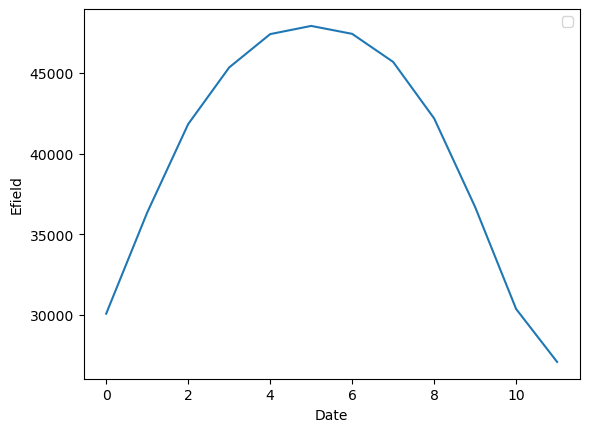

In [133]:
# 求热输出功率
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

Date = np.array(range(21, 365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

DB_Efield = []

for i in range(0, len(Date)):
    
    DNI_n = 0
    for j in Time:
        
        DNI_n += QDNI(Date[i], j)
        
        Sum_an = 0
        
        for k in range(0, len(df)): # df.iloc[i, 0]
            jiaodu_qxj = QXJ(Date[i],j,df.iloc[k, 0], df.iloc[k, 1])
            
            if  jiaodu_qxj >= 135 or jiaodu_qxj <= 90:
                Sum_an += (36*0.9)
            else:
                Sum_an += 36
                
    DNI_n /= 5
    DB_Efield.append(DNI_n * Sum_an * n_cos[i] * n_trunc[i] * n_sb[i] * 0.92 * 0.96517)
        
#-------\
plt.figure()
plt.plot(range(0,len(DB_Efield)), DB_Efield)
#添加x，y轴名称
plt.xlabel('Date')
plt.ylabel('Efield')
plt.legend()

In [134]:
print(DB_Efield)

[30074.54144565438, 36346.125890933006, 41832.473923310616, 45345.523024144815, 47413.71317261315, 47922.691304545166, 47431.18354484706, 45689.85252819131, 42186.54672791922, 36690.96222015785, 30365.172022295617, 27080.533973747086]


C:\Users\33398\AppData\Local\Temp\ipykernel_10624\179879945.py:5: RuntimeWarning: invalid value encountered in arccos
  hudu_ys = np.arccos(cos_ys); # 太阳方位角的弧度值
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


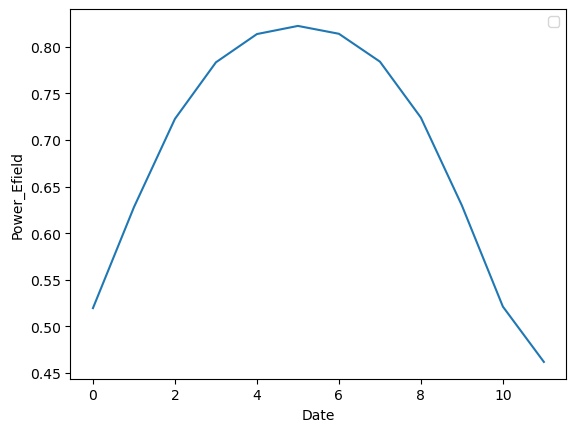

In [147]:
# 求热输出功率
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

Date = np.array(range(21, 365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

Power_Efield = []

for i in range(0, len(Date)):
    
    DNI_n = 0
    for j in Time:
        
        DNI_n += QDNI(Date[i], j)
        
        Sum_an = 0
        
        for k in range(0, len(df)): # df.iloc[i, 0]
            jiaodu_qxj = QXJ(Date[i],j,df.iloc[k, 0], df.iloc[k, 1])
            
            if  jiaodu_qxj >= 135 or jiaodu_qxj <= 90:
                Sum_an += (36*0.9)
            else:
                Sum_an += 36
    
             
    DNI_n /= 5
    # print("DNI_n: ", DNI_n, "Sum_an: ", Sum_an, "n_cos: ", n_cos[i], "n_trunc: ", n_trunc[i], "n_sb: ", n_sb[i])
    Power_Efield.append(DNI_n * n_cos[i] * n_trunc[i] * n_sb[i] * 0.92 * 0.96517)
        
#-------\
plt.figure()
plt.plot(range(0,len(Power_Efield)), Power_Efield)
#添加x，y轴名称
plt.xlabel('Date')
plt.ylabel('Power_Efield')
plt.legend()
plt.show()

In [136]:
print(Power_Efield)

[0.5195944327938417, 0.6279478841158433, 0.7227348952210371, 0.7834294450688989, 0.81374580669022, 0.8224812292682587, 0.8140456448846027, 0.7841597591767163, 0.7240336856471787, 0.6297537042785267, 0.5212117658155524, 0.4618351269807817]


____test____

In [137]:
# 计算余弦损失
def calculate_cosine_loss(theta):
    theta_rad = m.radians(theta)
    AM = (1 / m.cos(theta_rad))
    I_D_0 = 1.366 * 0.7
    I_D_thera = 1.366 * 0.7 ** (AM ** 0.678)
    cosine_loss = 1 - (I_D_0 - I_D_thera) / I_D_0

    return cosine_loss

In [138]:
Date = np.array(range(21,365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

n_cos = []

for i in Date:
    print(calculate_cosine_loss(Th(i)))

0.9999956163644299
0.9999986466933954
0.9999999982717005
0.9999984696897223
0.9999954244924277
0.9999938302857619
0.9999953775691393
0.9999984242430722
0.9999999961117305
0.9999986896888833
0.999995665300536
0.9999938448059235


In [139]:
def cosine_loss(D):

    
    Sum = 0
    Time = [9, 10.5, 12, 13.5, 15]
    
    for i in Time:
        # 天顶角
        hudu_td = (np.pi / 2) - As(D, i)
        # 大气质量
        AM = 1 / np.cos(hudu_td)
        # 直接辐射
        Id = 1.353 * 0.7 ** (AM ** 0.678)
    
        sunshi = (0.7 * 1.353 - Id) / (0.7 * 1.366)
        Sum += 1 - sunshi

    return Sum/5

In [140]:
Date = np.array(range(21,365, 30))
Time = np.array([9, 10.5, 12, 13.5, 15])

n_cos = []

for i in Date:
    for j in Time:
        print("cosine_loss: ", cosine_loss(i))

cosine_loss:  0.7320161308208695
cosine_loss:  0.7320161308208695
cosine_loss:  0.7320161308208695
cosine_loss:  0.7320161308208695
cosine_loss:  0.7320161308208695
cosine_loss:  0.8181258478790857
cosine_loss:  0.8181258478790857
cosine_loss:  0.8181258478790857
cosine_loss:  0.8181258478790857
cosine_loss:  0.8181258478790857
cosine_loss:  0.8887228372625244
cosine_loss:  0.8887228372625244
cosine_loss:  0.8887228372625244
cosine_loss:  0.8887228372625244
cosine_loss:  0.8887228372625244
cosine_loss:  0.9323221193463549
cosine_loss:  0.9323221193463549
cosine_loss:  0.9323221193463549
cosine_loss:  0.9323221193463549
cosine_loss:  0.9323221193463549
cosine_loss:  0.9537381127262042
cosine_loss:  0.9537381127262042
cosine_loss:  0.9537381127262042
cosine_loss:  0.9537381127262042
cosine_loss:  0.9537381127262042
cosine_loss:  0.9598696371933808
cosine_loss:  0.9598696371933808
cosine_loss:  0.9598696371933808
cosine_loss:  0.9598696371933808
cosine_loss:  0.9598696371933808
cosine_los